# The impact of multiple features on trip duration feature
## by Rahaf Aljehani


## Investigation Overview

> Throughout my investigation, I focused on the Trip Duration feature. My main goal was to find which of the other features has an impact on my chosen feature of interest. Moreover, I analyzed multiple features relationship regarding my feature of interest to have a better understanding of the whole features and how they affect my chosen feature of interest. 

## Dataset Overview

> I selected Ford GoBike System dataset for analysis, it includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. This data contains 183412 individual rides with 16 features, these features include duration variables such as:duration in sec, start time and end time, also include users information such as:user type and gender.

In [22]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [23]:
# loaded 201902-fordgobike-tripdata.csv dataset
fordgobike_df=pd.read_csv("201902-fordgobike-tripdata.csv")

In [24]:
# Display the dataset
fordgobike_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [25]:
# showed a brief summary of the dataframe by using info() method
fordgobike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [26]:
# Check for missing data by using isnull() method 
fordgobike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [27]:
# Drop missing values
fordgobike_df.dropna(inplace= True)
# Confirm correction
fordgobike_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [28]:
# Change start_time and end_time datatype to timestamp datatype
fordgobike_df.start_time=pd.to_datetime(fordgobike_df.start_time)
fordgobike_df.end_time=pd.to_datetime(fordgobike_df.end_time)

# Change start_station_id, end_station_id, bike_id and member_birth_year datatype to integer datatype
fordgobike_df.start_station_id=fordgobike_df.start_station_id.astype(int)
fordgobike_df.end_station_id=fordgobike_df.end_station_id.astype(int)
fordgobike_df.bike_id=fordgobike_df.bike_id.astype(int)
fordgobike_df.member_birth_year=fordgobike_df.member_birth_year.astype(int)

# Confirm correction
fordgobike_df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [29]:
# Create a function to determine the size of the charts
def size():
  return plt.figure(figsize=[8,5])

In [30]:
# Create a function to determine the color of the charts
def color():
  return sb.color_palette()[9]

## Distribution of trips duration
Distribution of trips duration has right skewed (long talied). So,I used a log transformation on the x-axis, after log transformation most of the trips duration are between 100 and 2500 seconds with one peak around 650 seconds approximately.

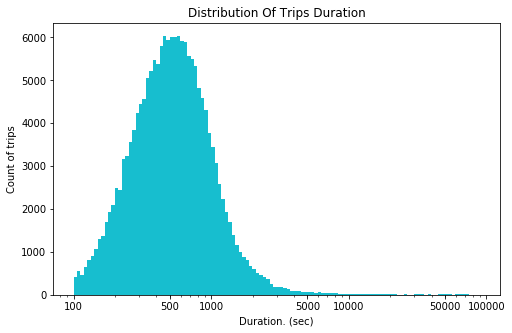

In [31]:
# Use a log transformation on the x-axis 
# Plot a histogram for numeric variable
size() # call size() function
bins= 10 ** np.arange(2,np.log10(fordgobike_df['duration_sec'].max())+0.025,0.025)
plt.hist(data=fordgobike_df, x="duration_sec",color=color(),bins=bins);
plt.title("Distribution Of Trips Duration")
plt.xlabel('Duration. (sec)')
plt.ylabel("Count of trips")
plt.xscale('log')
plt.xticks([100,500,1000,5000,10000,50000,100000], [100,500,1000,5000,10000,50000,100000]);
plt.show()

## Distribution of trips taken in days of the week
The number of trips increases on Thursday, and the number of trips decreases on Saturday and Sunday.

In [32]:
# We need to create a new column called start_day 
#By extract the day from start_time column
fordgobike_df['start_day']= fordgobike_df.start_time.dt.strftime('%A')

In [33]:
# First we need to order the days 
# The order of the days
days =['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']
order_days= pd.api.types.CategoricalDtype(ordered=True, categories=days)

# Use pandas.astype() to convert the "start_day" column from a object type into an ordered categorical type 
fordgobike_df['start_day'] = fordgobike_df['start_day'].astype(order_days);

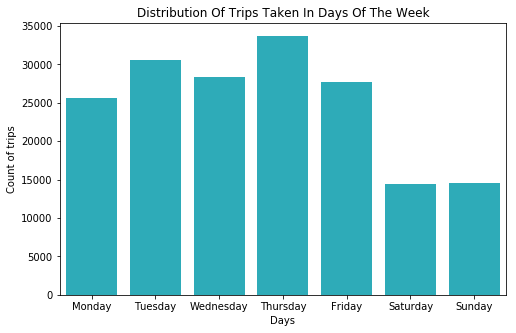

In [34]:
# Plot a bar chart
size() # call size() function
sb.countplot(data=fordgobike_df, x="start_day",color=color());
plt.title("Distribution Of Trips Taken In Days Of The Week")
plt.xlabel('Days')
plt.ylabel("Count of trips")
plt.show()

## The impact of week days trip on trip duration
on Saturday and Sunday, the duration of the trips is longer than the rest of the week.

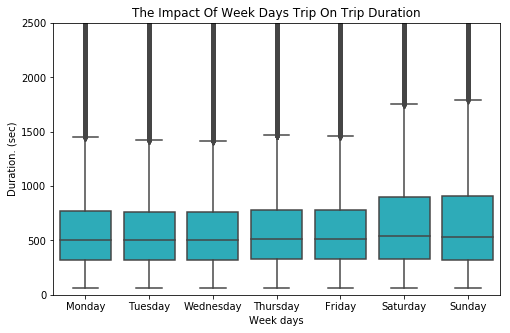

In [35]:
# Plot a box plot
size() # call size() function
sb.boxplot(data=fordgobike_df, x="start_day", y="duration_sec", color=color());
plt.title("The Impact Of Week Days Trip On Trip Duration")
plt.xlabel('Week days')
plt.ylabel("Duration. (sec)")
plt.ylim([0,2500])
plt.show()

## The impact of user age on trip duration
The users who spend more trip duration are between the ages of 18 and 40 years.

In [36]:
# We need to create a new column called user_age to compute the ages of users from member_birth_year variable
# By subtracting 2019 from member_birth_year column
fordgobike_df["user_age"]= 2019 - fordgobike_df["member_birth_year"]

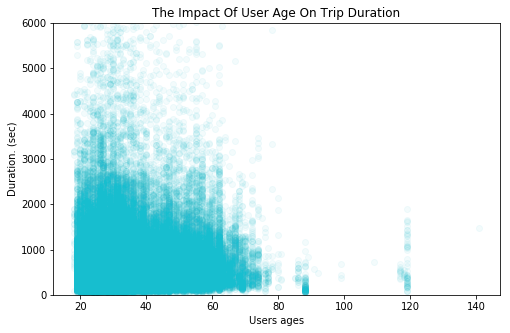

In [37]:
# Plot a scatter plot
size() # call size() function
plt.scatter(data=fordgobike_df, x="user_age", y="duration_sec", color=color(),marker="o",alpha=1/20);
plt.title("The Impact Of User Age On Trip Duration")
plt.xlabel('Users ages')
plt.ylabel("Duration. (sec)")
plt.ylim([0,6000])
plt.show()

## Trip duration and days of week by user type
- In general, customer users have a longer trip duration throughout the week than subscriber users.
- On Saturday and Sunday, the duration of the trips was longer than the rest of the days of the week for both the subscribers and customers users.

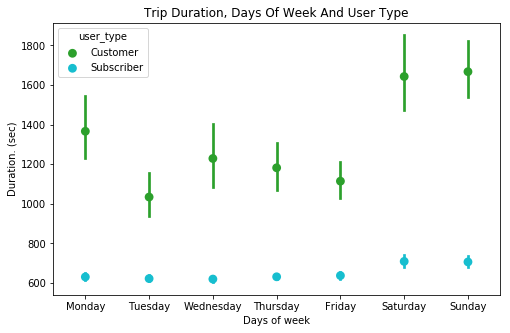

In [38]:
# Plot a line chart
size()
ax = sb.pointplot(data = fordgobike_df, x = 'start_day', y = 'duration_sec', hue = 'user_type',
           palette= ["#2ca02c", "#17becf"],linestyles="")
plt.title('Trip Duration, Days Of Week And User Type')
plt.ylabel('Duration. (sec)')
plt.xlabel('Days of week')
plt.show();

## Trip duration and days of week by user gender
- In general, females users have a longer trip duration throughout the week than males users.
- On Saturday and Sunday, the duration of the trips was longer than the rest of the days of the week for both the females and males users .

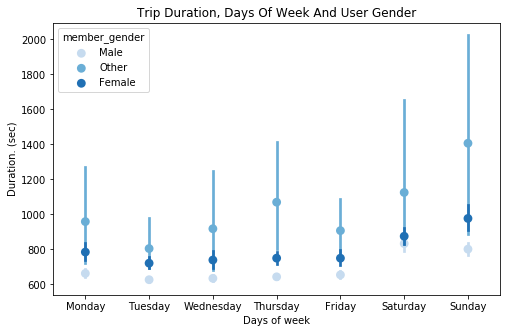

In [39]:
# Plot a line chart
size()
ax = sb.pointplot(data = fordgobike_df, x = 'start_day', y = 'duration_sec', hue = 'member_gender',
           palette= 'Blues',linestyles="")
plt.title('Trip Duration, Days Of Week And User Gender')
plt.ylabel('Duration. (sec)')
plt.xlabel('Days of week')
plt.show();